**Import libraries**

In [51]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import joblib
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Load dataset**

In [52]:
# Load the dataset into a DataFrame
data = pd.read_csv("earthquake_1995-2023.csv")

In [53]:
data.head(1)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177,25.0,mww,192.955,-13.8814,167.158,"Sola, Vanuatu",NaN,Vanuatu


In [54]:
data.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

**Data pre-processing**

In [55]:
data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

**Checking for Null Values**

In [57]:
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

**Handling Missing values**

In [58]:
data["alert"] = data["alert"].fillna("red")
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [59]:
# Drop unnecessary columns
data = data.drop(columns=['title', 'date_time', 'net', 'magType', 'location', 'continent', 'country'])

In [60]:
data

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,green,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,yellow,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,green,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,green,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,red,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0,9,red,0,776,0,0.000000,0.0,11.000,52.6290,142.8270
996,7.7,0,4,red,0,912,0,0.000000,0.0,20.200,-23.0080,169.9000
997,6.9,0,6,red,0,732,0,0.000000,0.0,11.200,-8.3780,125.1270
998,6.6,0,9,red,0,670,0,0.000000,0.0,14.000,40.1490,21.6950


In [61]:
data.dtypes

magnitude    float64
cdi            int64
mmi            int64
alert         object
tsunami        int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
dtype: object

In [62]:
# Perform label encoding on the 'alert' column
data['alert'] = pd.Categorical(data['alert'])
data['alert'] = data['alert'].cat.codes

# Convert the remaining columns to numeric format
numeric_columns = ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')



In [63]:
data.corr()

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
magnitude,1.000000,0.163170,0.282275,0.128771,-0.001213,0.512358,0.091427,-0.081518,-0.087029,0.017083,-0.017505,-0.010710
cdi,0.163170,1.000000,0.197458,-0.142914,0.292202,0.479911,-0.003857,0.140505,0.277689,-0.051331,0.065383,-0.132190
mmi,0.282275,0.197458,1.000000,0.401446,-0.175441,0.398149,0.110260,-0.307331,-0.068503,-0.517002,0.180799,-0.019398
alert,0.128771,-0.142914,0.401446,1.000000,-0.567999,0.162161,0.401044,-0.505868,-0.125896,-0.245834,0.201746,0.080392
tsunami,-0.001213,0.292202,-0.175441,-0.567999,1.000000,0.024848,-0.426026,0.443179,0.236259,0.070705,-0.127002,-0.131340
sig,0.512358,0.479911,0.398149,0.162161,0.024848,1.000000,0.016636,-0.051440,0.158853,-0.079263,0.177575,-0.164200
nst,0.091427,-0.003857,0.110260,0.401044,-0.426026,0.016636,1.000000,-0.402445,0.003023,-0.103897,0.109991,0.156543
dmin,-0.081518,0.140505,-0.307331,-0.505868,0.443179,-0.051440,-0.402445,1.000000,0.091388,0.192698,-0.239791,-0.075595
gap,-0.087029,0.277689,-0.068503,-0.125896,0.236259,0.158853,0.003023,0.091388,1.000000,-0.062215,0.052368,-0.267812
depth,0.017083,-0.051331,-0.517002,-0.245834,0.070705,-0.079263,-0.103897,0.192698,-0.062215,1.000000,-0.101446,-0.030632


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>],
       [<Axes: title={'center': 'alert'}>,
        <Axes: title={'center': 'tsunami'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>]], dtype=object)

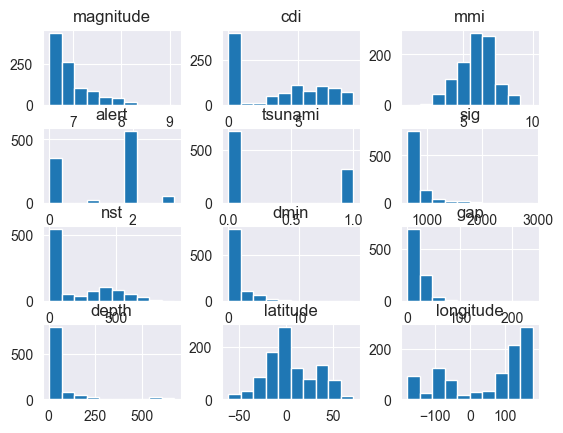

In [64]:
data.hist()

In [65]:
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

In [66]:
# Creating visually differentiable values      v Diminishing the difference, to avoid vanishing points in map
data['power'] = pow(10, data['magnitude']) / pow(3, data['magnitude'])
data['power'] = data['power'].round(0)

fig = make_world_fig(data=data, lat='latitude', lon='longitude', hover_name='magnitude', size='power', cl_disc_seq=["red"], zoom=1.5, height=500)
fig.show()

In [67]:
data['sig'] = data['sig'] ** 2 / 10_000 # Creating visually differentiable values according to sig
data['sig'] = data['sig'].round(0)

fig = make_world_fig(data, 'latitude', 'longitude', 'magnitude', 'sig', ["red"], 1.5, 500)
fig.show()

In [68]:
tsun = data[data['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["orange"], 1.5, 500)
fig.show()

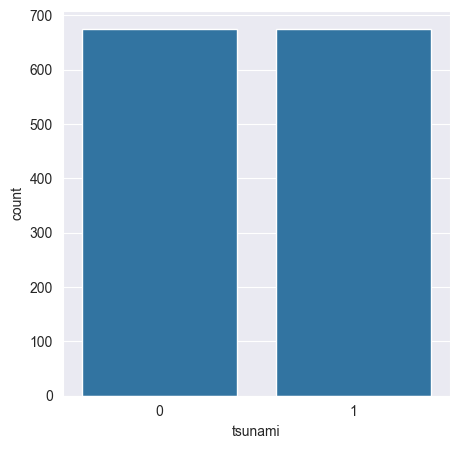

In [69]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into two classes
class_0 = data[data['tsunami'] == 0]
class_1 = data[data['tsunami'] == 1]

# Resample the minority class (assuming class 1 is the minority class)
class_1_resampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Concatenate the resampled minority class with the majority class
balanced_data = pd.concat([class_0, class_1_resampled])

# Plot the balanced data
plt.figure(figsize=(5, 5))
sns.countplot(data=balanced_data, x='tsunami')
plt.show()


In [70]:
X=data.drop('tsunami',axis=1)
y=data['tsunami']

In [71]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(800, 12) (200, 12) (800,) (200,)


In [73]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LinearRegression

# Instantiate Linear Regression model
l1 = LinearRegression()
# Train the model
l1.fit(X_train, y_train)


LinearRegression()

In [75]:
y_pred=l1.predict(X_test)
y_pred

array([ 0.19621493, -0.02313444, -0.06330834, -0.10075393,  0.7243067 ,
        0.09267249,  0.28481181,  0.18430877,  0.14835518,  0.66559385,
        0.09453945,  0.90652418, -0.1011568 ,  0.22025932,  0.13028407,
        0.1141546 ,  0.73729501,  0.08844379, -0.05408236,  0.76468118,
        0.25693796,  0.88218589,  0.72730876,  0.10890986,  0.63673091,
        0.19480609,  0.86106458,  0.08093653,  0.15151382,  0.15517496,
        0.75722003,  0.69437632,  0.13759492,  0.07993513,  0.69723572,
        0.62031726,  0.08397663,  0.28448348,  0.07974866,  0.76395854,
        0.67107814,  0.91454644,  0.67376961,  0.1382565 ,  0.74836293,
        0.87275194,  0.08620153,  0.07398786,  0.33308148, -0.11241046,
        0.22418604,  0.14867764,  0.86893735,  0.18243599,  0.57910324,
        0.66507012,  0.04343647,  0.70986237,  1.02378647, -0.0986989 ,
        0.6575843 ,  0.62877097,  0.76584848,  0.61013608,  0.07525201,
        0.00740893,  0.14128999,  0.12743563,  0.44849774,  0.09

In [76]:
print(y_test.dtype)
print(y_pred.dtype)

int64
float64


In [77]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [78]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

82.5

In [79]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(X_train,y_train)

SVC(kernel='linear', random_state=2)

In [80]:
y_pred1=SVM.predict(X_test)
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [81]:
ac1=accuracy_score(y_test,y_pred1)*100
ac1

83.0

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred3=dt.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [84]:
ac3 = accuracy_score(y_test, y_pred3)*100
ac3

91.0

In [85]:
from sklearn.neural_network import MLPClassifier

# Create MLP model
mlp = MLPClassifier()

# Train the MLP model
mlp.fit(X_train, y_train)

MLPClassifier()

In [86]:
y_pred4=dt.predict(X_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [87]:
ac4 = accuracy_score(y_test, y_pred4)*100
ac4

91.0

In [88]:
models = [' LinearRegression', 'SVM', 'Decision Tree', 'MLP']
accuracies = [ac, ac1, ac3, ac4]

evaluation_df = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})
evaluation_df

,Model,Accuracy (%)
0,LinearRegression,82.5
1,SVM,83.0
2,Decision Tree,91.0
3,MLP,91.0


In [89]:
import pandas as pd

models = ['Linear Regression', 'SVM', 'Decision Tree', 'MLP']
accuracies = [ac, ac1, ac3, ac4]

evaluation_df = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})

# Sort DataFrame by Accuracy (%) in descending order
sorted_evaluation_df = evaluation_df.sort_values(by='Accuracy (%)', ascending=False)

# Display the top three algorithms
top_three = sorted_evaluation_df.head(3)
print("Top three algorithms based on accuracy:")
print(top_three)

Top three algorithms based on accuracy:
           Model  Accuracy (%)
2  Decision Tree          91.0
3            MLP          91.0
1            SVM          83.0


In [90]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test,
                              'Predicted (LinearRegression)': y_pred,
                              'Predicted (SVM)': y_pred1,
                              'Predicted (Decision Tree)': y_pred3,
                              'Predicted (MLP)': y_pred4})

# Display the first few rows of the DataFrame
print(comparison_df.head())

     Actual  Predicted (LinearRegression)  Predicted (SVM)  \
521       0                             0                0   
737       0                             0                0   
740       0                             0                0   
660       0                             0                0   
411       0                             1                1   

     Predicted (Decision Tree)  Predicted (MLP)  
521                          0                0  
737                          0                0  
740                          0                0  
660                          0                0  
411                          0                0  


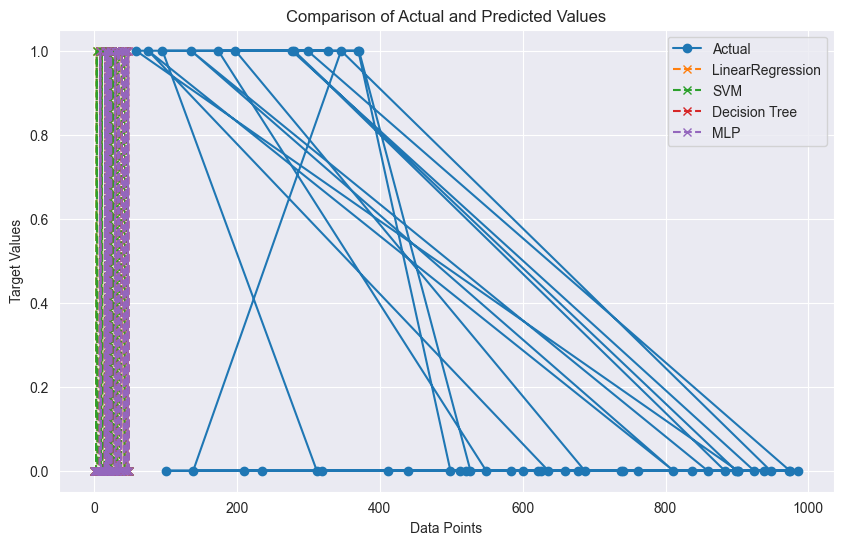

In [91]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test[:50], label='Actual', marker='o')

# Plot predicted values for each model
plt.plot(y_pred[:50], label='LinearRegression', linestyle='--', marker='x')
plt.plot(y_pred1[:50], label='SVM', linestyle='--', marker='x')
plt.plot(y_pred3[:50], label='Decision Tree', linestyle='--', marker='x')
plt.plot(y_pred4[:50], label='MLP', linestyle='--', marker='x')

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Calculate the average prediction across all models
average_prediction = (y_pred + y_pred1 + y_pred3 + y_pred4) / 4

# Display the first few values of the average prediction
print("Average Prediction:")
print(average_prediction[:10])

Average Prediction:
[0.  0.  0.  0.  0.5 0.  0.  0.  0.  1. ]


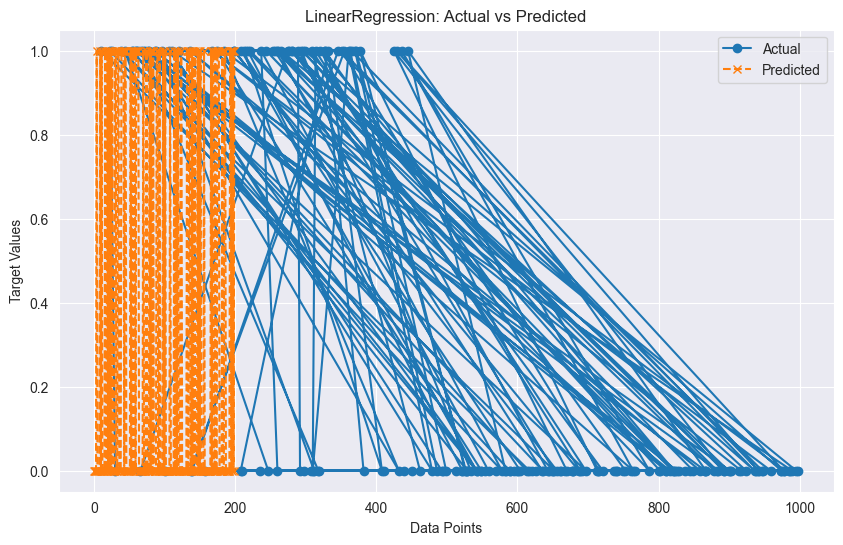

In [93]:
# Create a figure for Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', linestyle='--', marker='x')
plt.title('LinearRegression: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

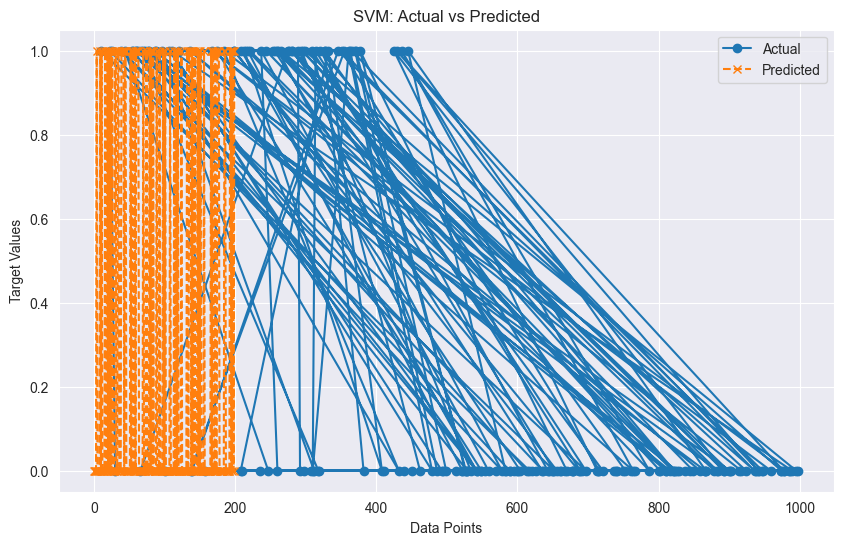

In [94]:
# Create a figure for SVM
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred1, label='Predicted', linestyle='--', marker='x')
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

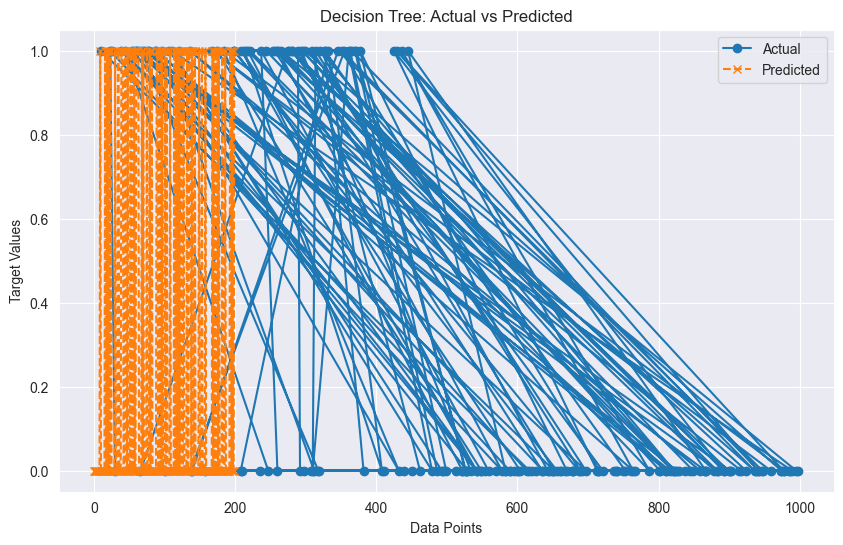

In [95]:
# Create a figure for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred3, label='Predicted', linestyle='--', marker='x')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

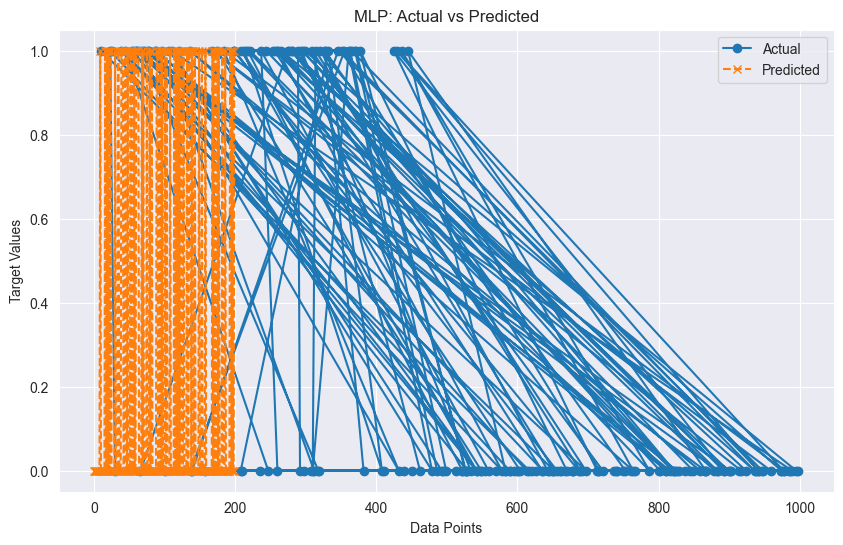

In [96]:
# Create a figure for MLP
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred4, label='Predicted', linestyle='--', marker='x')
plt.title('MLP: Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# Print the columns included in X before splitting
print("Columns included in X before splitting:")
print(X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of X_train to confirm the number of samples and features
print("Shape of X_train:", X_train.shape)

# Now you can also print the columns included in X_train
print("Columns included in X_train:")
print(X_train.columns)


Columns included in X before splitting:
Index(['magnitude', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'power'],
      dtype='object')
Shape of X_train: (800, 12)
Columns included in X_train:
Index(['magnitude', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'power'],
      dtype='object')


In [98]:
# Save models
joblib.dump(l1, 'LinearRegression_model_earthquake.pkl')
joblib.dump(SVM, 'svm_model_earthquake.pkl')
joblib.dump(dt, 'decision_tree_model_earthquake.pkl')
joblib.dump(mlp, 'mlp_model_earthquake.pkl')

['mlp_model_earthquake.pkl']

In [99]:
# Load models
loaded_lr_model = joblib.load('LinearRegression_model_earthquake.pkl')
loaded_svm_model = joblib.load('svm_model_earthquake.pkl')
loaded_dt_model = joblib.load('decision_tree_model_earthquake.pkl')
loaded_mlp_model = joblib.load('mlp_model_earthquake.pkl')

In [100]:
5
import pandas as pd

# Define the features expected by the models
features = ['magnitude', 'cdi', 'mmi', 'alert', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'power']


# Take input data from the user
new_data = pd.DataFrame(columns=features)
for col in new_data.columns:
    new_data[col] = [float(input(f"Enter {col}: "))]


print(new_data)

ValueError: could not convert string to float: ''

In [ ]:
# Make predictions on new data
lr_predictions = loaded_lr_model.predict(new_data)
svm_predictions = loaded_svm_model.predict(new_data)
dt_predictions = loaded_dt_model.predict(new_data)
mlp_predictions = loaded_mlp_model.predict(new_data)

In [ ]:

# Print predictions
print("LinearRegression Predictions:", lr_predictions)
print("SVM Predictions:", svm_predictions)
print("Decision Tree Predictions:", dt_predictions)
print("MLP Predictions:", mlp_predictions)

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the dataset into a DataFrame
file_path = "D:/projects/flood&earthquake/Earthquake/earthquake_data_test.csv"
data = pd.read_csv(file_path)



In [ ]:

# Assuming 'latitude', 'longitude', 'magnitude', and 'power' columns exist in the CSV
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
                            hover_name=hover_name,
                            size=size,
                            color_discrete_sequence=cl_disc_seq,
                            zoom=zoom, height=height
                           )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]}
        ]
    )

    return fig

In [ ]:

# Creating visually differentiable values v Diminishing the difference, to avoid vanishing points in map
data['power'] = pow(10, data['magnitude']) / pow(3, data['magnitude'])
data['power'] = data['power'].round(0)

In [ ]:
fig = make_world_fig(data=data, lat='latitude', lon='longitude', hover_name='magnitude', size='power', cl_disc_seq=["red"], zoom=1.5, height=500)
fig.show()